In [90]:
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Function to load data from the file and preprocess it

In [91]:
def loadData(lines):
    rows =[]
    headers = lines[0].strip().split(',')
    #cast each row's values from string to float and form a list of rows
    for line in lines[1:]:
        flag = 0
        l = []
        for x in line.split(','):
            if(x == ''):
                flag=1
                break
            else:
                l.append(float(x))
        if flag == 0:
            rows.append(l)

    columns = len(rows[0]) - 1 #no. of features
    print('No. of records: ',len(rows))
    return headers, rows, columns

Function to have the same shuffle and split

In [92]:
def shuffleData(rows):
    np.random.seed(0)
    np.random.shuffle(rows)
    return rows

Function to split data

In [93]:
def splitData(rows):
    trainData, testData, trainTarget, testTarget, trainFeatures, testFeatures = [], [], [], [], [], []

    #70% of the data is used as train data
    for i in range(int(0.7 * len(rows))):
        trainData.append(rows[i])
        trainTarget.append(rows[i][-1]) #the output column values of train data
        trainFeatures.append(rows[i][:-1]) #the list of feature values of train data

    #remainder(30%) of the data is used as test data 
    for i in range(int(0.7 * len(rows)), len(rows)):
        testData.append(rows[i])
        testTarget.append(rows[i][-1]) #the output column values of test data
        testFeatures.append(rows[i][:-1]) #the list of feature values of test data

    #Display train data and test data target values
    print('trainTarget: ',  trainTarget)
    print('testTarget: ', testTarget)
    return trainData, testData, trainTarget, testTarget, trainFeatures, testFeatures

Distance metrics

In [94]:
def euclideanDistance(v1, v2):
    dist = 0
    for i in range(len(v1) - 1):
        dist += (v1[i] - v2[i])**2
    return math.sqrt(dist)

def manhattanDistance(v1, v2):
    dist = 0
    for i in range(len(v1) - 1):
        dist += abs(v1[i] - v2[i])
    return dist

def chebyshevDistance(v1, v2):
    dist = []
    for i in range(len(v1) - 1):
        dist.append(abs(v1[i] - v2[i]))
    return max(dist)

Function to calculate the distance between the test data pt with every train data pt

In [95]:
def calcDist(testRow, distFunc, trainFeatures):
    distances = []
    for index,trainRow in enumerate(trainFeatures):
        dis = distFunc(trainRow, testRow)
        distances.append((index, dis))
    return sorted(distances, key = lambda x: x[1])

In [96]:
#to find the best label for the data point
def mode(labels):
    return Counter(labels).most_common(1)[0][0]

In [97]:
#knn model
def knnModel(kValue, testFeatures, trainFeatures, distFunc):
    kNearestNeighbours = []
    kNearestLabels = []
    for index,row in enumerate(testFeatures):
        neighbours = calcDist(row, distFunc, trainFeatures)
        kNearestNeighbours.append(neighbours[:kValue])
        klabels = [trainTarget[i] for i, dis in kNearestNeighbours[index]]
        nearestLabel = mode(klabels)
        kNearestLabels.append((index, nearestLabel))
    return kNearestLabels

Function to normalize dataset

In [98]:
def normalizeDataset():
    column, normalRow, normalRows = [], [], []
    for i in range(columns+1):
        cols=[j[i] for j in rows]
        column.append(cols)
        cols=[]

    minimum=[min(i) for i in column]
    maximum=[max(i) for i in column]
    for i in range(len(rows)):
        for j in range(len(rows[0])):
            if not j == len(rows[0])-1:
                normalRow.append((rows[i][j] - minimum[j]) / (maximum[j] - minimum[j]))
            else:
                normalRow.append(rows[i][j])
        normalRows.append(normalRow)
        normalRow = []

    return normalRows

In [99]:
#performance metrics calculation
def classificationReport(kNearestLabels):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i, label in kNearestLabels:
        if testTarget[i] == label and label == 1:
            TP += 1
        elif testTarget[i] == label and label == 0:
            TN += 1
        elif testTarget[i] != label and label == 1:
            FP += 1
        else:
            FN += 1
    
    confusionMatrix = [[TP, FN], [FP, TN]]
    print('Confusion Matrix:\n', str(confusionMatrix[0][0])+' '+str(confusionMatrix[0][1])+'\n '+str(confusionMatrix[1][0])+' '+str(confusionMatrix[1][1]))
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    print('Accuracy: ',Accuracy)
    Precision = TP / (TP + FP)
    print('Precision: ',Precision)
    Recall = TP / (TP + FN)
    print('Recall: ',Recall)
    return Accuracy

In [100]:
fileName = "diabetes.csv"
fp = open(fileName, 'r')
lines = fp.readlines()

headers, rows, columns = loadData(lines) #function call to load data (also acts as the main function)

rows = shuffleData(rows) #function call to shuffle data

trainData, testData, trainTarget, testTarget, trainFeatures, testFeatures = splitData(rows) #function call to split data


No. of records:  743
trainTarget:  [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0,

In [101]:
#performance of the model on train data
kNearestLabels = knnModel(13, trainFeatures, trainFeatures, distFunc=euclideanDistance)
scores = []
for i, label in kNearestLabels:
    correct = 0
    if trainTarget[i] == label:
        correct += 1
    scores.append(correct)
print('\nAccuracy on training data: ', (sum(scores)/float(len(scores))))


Accuracy on training data:  0.7884615384615384


Performance of the model at different k values

In [102]:
accuracy = []
for kValue in range(1, 16): 
    kNearestLabels = knnModel(kValue, testFeatures, trainFeatures, distFunc=euclideanDistance)
    print('\nPerformance of KNN model using euclidean distance when k = '+str(kValue))
    accuracy.append(classificationReport(kNearestLabels))


Performance of KNN model using euclidean distance when k = 1
Confusion Matrix:
 38 40
 40 105
Accuracy:  0.6412556053811659
Precision:  0.48717948717948717
Recall:  0.48717948717948717

Performance of KNN model using euclidean distance when k = 2
Confusion Matrix:
 38 40
 40 105
Accuracy:  0.6412556053811659
Precision:  0.48717948717948717
Recall:  0.48717948717948717

Performance of KNN model using euclidean distance when k = 3
Confusion Matrix:
 33 45
 31 114
Accuracy:  0.6591928251121076
Precision:  0.515625
Recall:  0.4230769230769231

Performance of KNN model using euclidean distance when k = 4
Confusion Matrix:
 39 39
 36 109
Accuracy:  0.6636771300448431
Precision:  0.52
Recall:  0.5

Performance of KNN model using euclidean distance when k = 5
Confusion Matrix:
 34 44
 29 116
Accuracy:  0.672645739910314
Precision:  0.5396825396825397
Recall:  0.4358974358974359

Performance of KNN model using euclidean distance when k = 6
Confusion Matrix:
 36 42
 32 113
Accuracy:  0.66816143

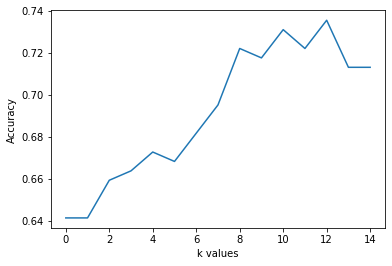

In [103]:
#plot to show the variation of accuracy with different k values
plt.plot(accuracy)
plt.ylabel("Accuracy")
plt.xlabel("k values")
plt.show()

From the above plot, we observe that the model accuracy increases with increase in the k value and reaches a maximum of 73.5% at k = 13

In [104]:
#choosing the k value that gave the highest accuracy
kValue = 13

In [105]:
#using different distance metrics: manhattanDistance and chebyshevDistance
distanceMetrics = [euclideanDistance, manhattanDistance, chebyshevDistance]
for metric in distanceMetrics:
    kNearestLabels = knnModel(kValue, testFeatures, trainFeatures, distFunc=metric)
    print('\nPerformance of KNN model using '+ metric.__name__ + ' when k = '+str(kValue))
    classificationReport(kNearestLabels)


Performance of KNN model using euclideanDistance when k = 13
Confusion Matrix:
 41 37
 22 123
Accuracy:  0.7354260089686099
Precision:  0.6507936507936508
Recall:  0.5256410256410257

Performance of KNN model using manhattanDistance when k = 13
Confusion Matrix:
 39 39
 17 128
Accuracy:  0.7488789237668162
Precision:  0.6964285714285714
Recall:  0.5

Performance of KNN model using chebyshevDistance when k = 13
Confusion Matrix:
 38 40
 23 122
Accuracy:  0.7174887892376681
Precision:  0.6229508196721312
Recall:  0.48717948717948717


Normalizing the dataset

In [106]:
normalRows = normalizeDataset()
#splitting normalized dataset
normalTrainData, normalTestData, normalTrainTarget, normalTestTarget, normalTrainFeatures, normalTestFeatures = splitData(normalRows)

trainTarget:  [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 

In [107]:
#performance of the KNN model on the normalized dataset 
print("\nPerformance on normalizing the dataset")
kNearestLabels = knnModel(kValue, normalTestFeatures, normalTrainFeatures, distFunc=euclideanDistance)
classificationReport(kNearestLabels)


Performance on normalizing the dataset
Confusion Matrix:
 36 42
 12 133
Accuracy:  0.757847533632287
Precision:  0.75
Recall:  0.46153846153846156


0.757847533632287

Ablation study on the normalized dataset

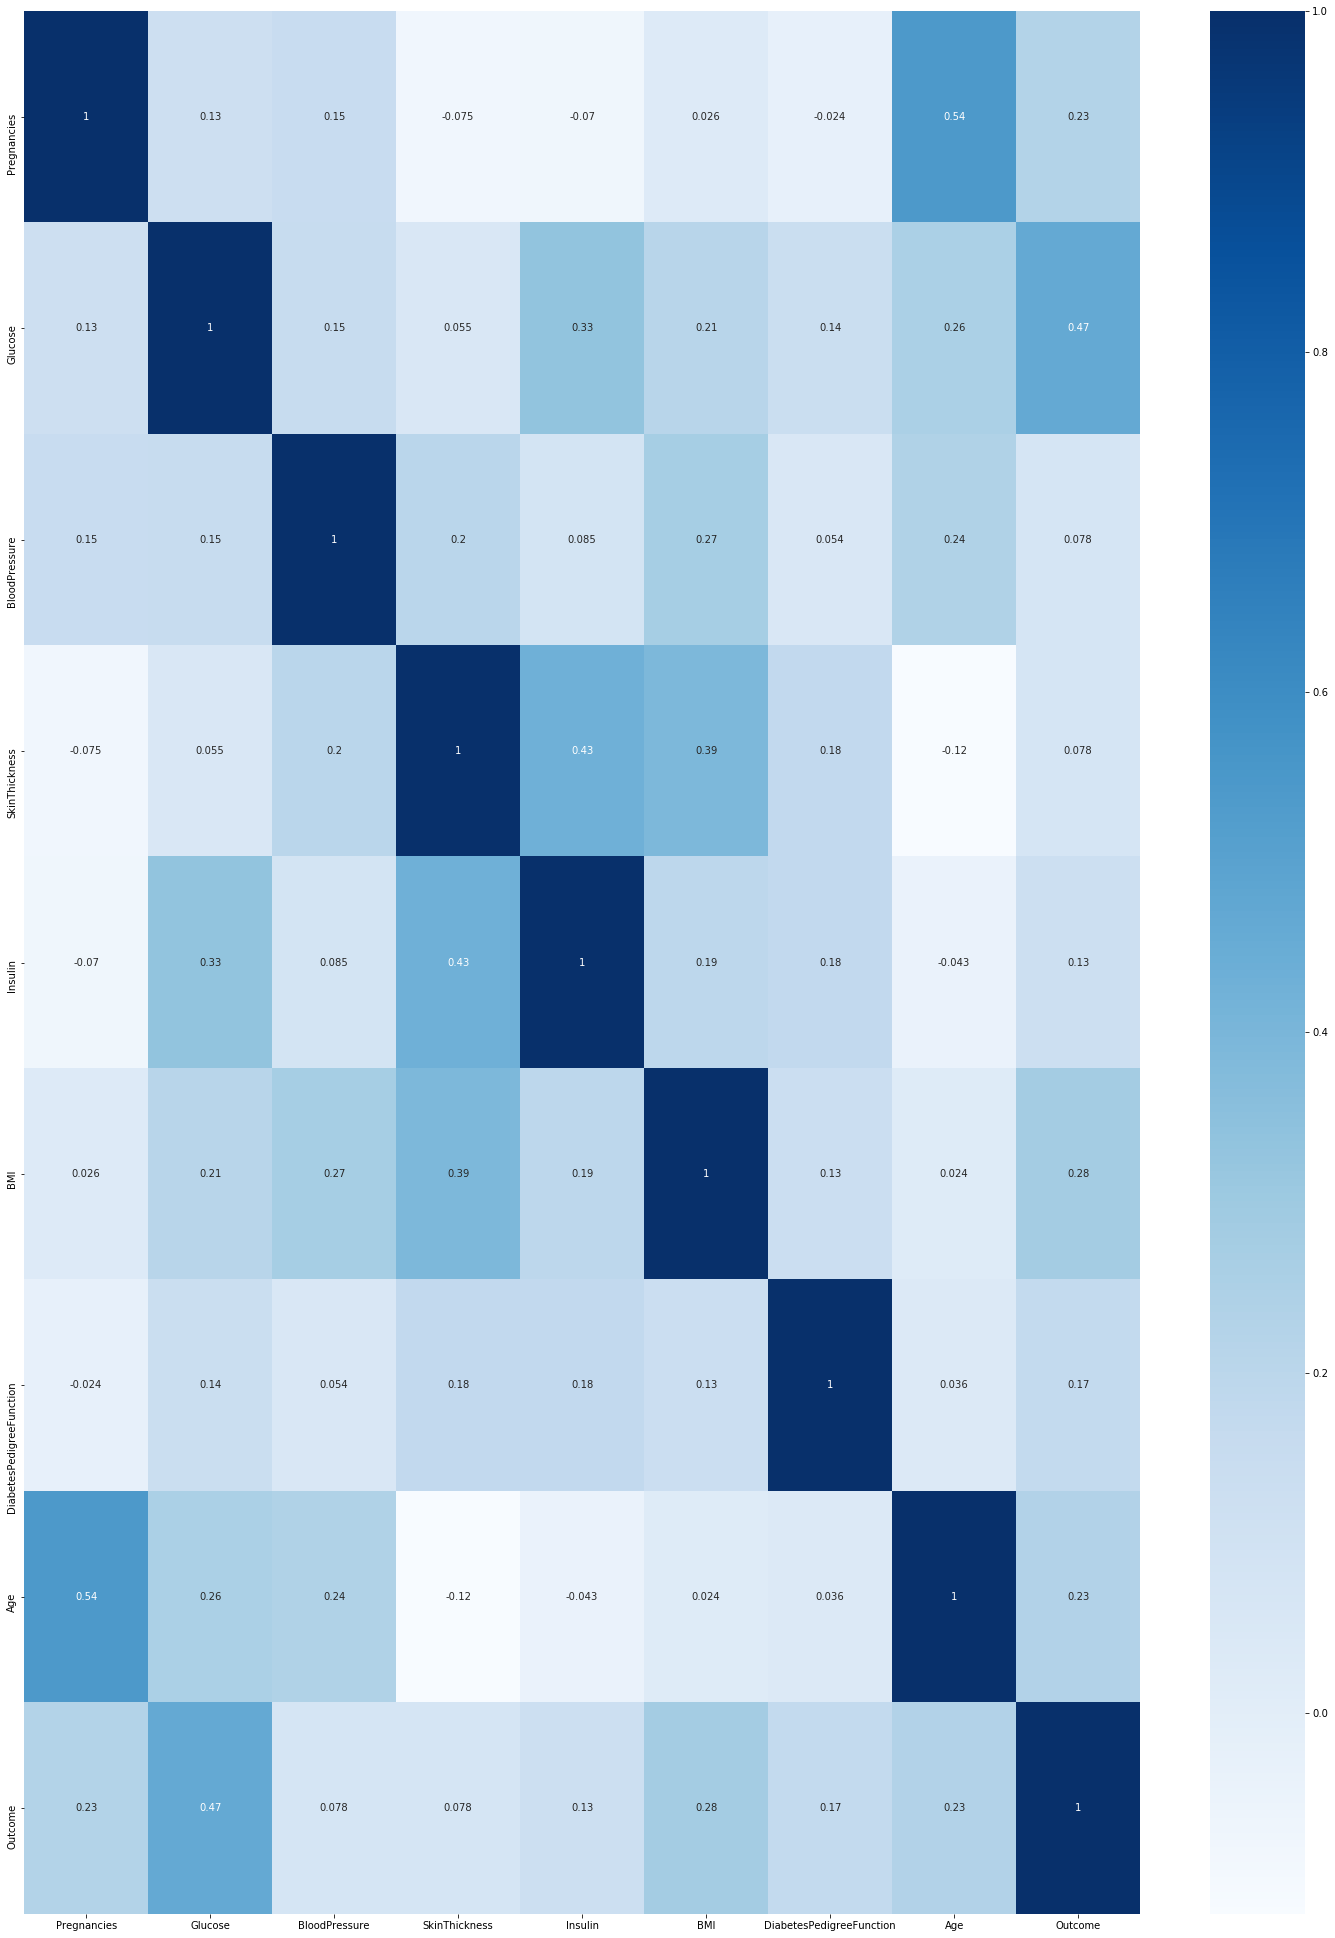

In [108]:
# converting list of lists to a dataframe
df = pd.DataFrame(normalRows, columns = headers)

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,35))
#plot heat map
ax=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")
plt.show()

From the above plot, we observe that BloodPressure and SkinThickness columns correlate the least with the Outcome

In [109]:
#dropping the columns that are least correlated with the outcome
df.drop(['BloodPressure', 'SkinThickness'], inplace=True, axis=1)
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.000000,0.738693,0.000000,0.637854,0.126815,0.050000,0.0
1,0.000000,0.542714,0.000000,0.406855,0.302733,0.183333,0.0
2,0.058824,0.517588,0.098109,0.645306,0.044833,0.200000,0.0
3,0.117647,0.452261,0.000000,0.569300,0.181469,0.100000,1.0
4,0.176471,0.437186,0.000000,0.324888,0.156277,0.000000,0.0


In [110]:
newRows = df.values.tolist()

newRows = shuffleData(newRows) #function call to shuffle data
trainData, testData, trainTarget, testTarget, trainFeatures, testFeatures = splitData(newRows) #function call to split data
kNearestLabels = knnModel(kValue, testFeatures, trainFeatures, distFunc=euclideanDistance)

trainTarget:  [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 

In [111]:
print("\nPerformance of the model after dropping the least correlated columns from the normalized dataset")
classificationReport(kNearestLabels)


Performance of the model after dropping the least correlated columns from the normalized dataset
Confusion Matrix:
 44 34
 20 125
Accuracy:  0.757847533632287
Precision:  0.6875
Recall:  0.5641025641025641


0.757847533632287

Conclusion

In the above code, the KNN model has been used to classify the diabetes dataset. The accuracy of the model over the training data is around 78.8% and on the test data is around 73.5% at k = 13. Also the model accuracy increases to 75.8% on normalizing the dataset. On performing the feature ablation study and dropping the columns that are least correlated to the outcome from the normalized dataset, the model accuracy reaches around 76%